In [6]:
import yfinance as yf

In [7]:
tesla_data = yf.download("TSLA", start="2022-01-01", end="2023-01-01")

[*********************100%%**********************]  1 of 1 completed


In [8]:
tesla_data.reset_index(inplace=True)

In [9]:
tesla_data.to_csv('tesla_stock_data.csv', index=False)

In [10]:
print(tesla_data.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2022-01-03  382.583344  400.356659  378.679993  399.926666  399.926666   
1 2022-01-04  396.516663  402.666656  374.350006  383.196655  383.196655   
2 2022-01-05  382.216675  390.113342  360.336670  362.706665  362.706665   
3 2022-01-06  359.000000  362.666656  340.166656  354.899994  354.899994   
4 2022-01-07  360.123322  360.309998  336.666656  342.320007  342.320007   

      Volume  
0  103931400  
1  100248300  
2   80119800  
3   90336600  
4   84164700  


In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [27]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data  = requests.get(url).text

In [28]:
soup = BeautifulSoup(html_data, 'html5lib')

In [29]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [42]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find_all("tbody")[0].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

tesla_revenue.head()

IndexError: list index out of range

In [41]:
tesla_revenue.tail()

,Date,Revenue




# Question 3: Use yfinance to Extract Stock Data
Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.


In [43]:
gme = yf.Ticker("GME")

In [44]:
gme_data = gme.history(period="max")

In [45]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [ ]:
import pandas as pd

In [49]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

In [50]:
soup = BeautifulSoup(html_data, 'html5lib')

In [52]:

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

gme_revenue.head()


,Date,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"


# Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

In [54]:
import matplotlib.pyplot as plt

In [56]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

NameError: name 'make_graph' is not defined

In [57]:
def make_graph(data, revenue, company_name):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Stock Price')
    plt.plot(revenue['Date'], revenue['Revenue'], label='Revenue', color='orange')
    plt.title(f'{company_name} Stock Price and Revenue Over Time')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

make_graph(tesla_data, tesla_revenue, 'Tesla')

In [ ]:
Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

Upload a screenshot of your results.



AttributeError: 'America/New_York' object has no attribute 'update'

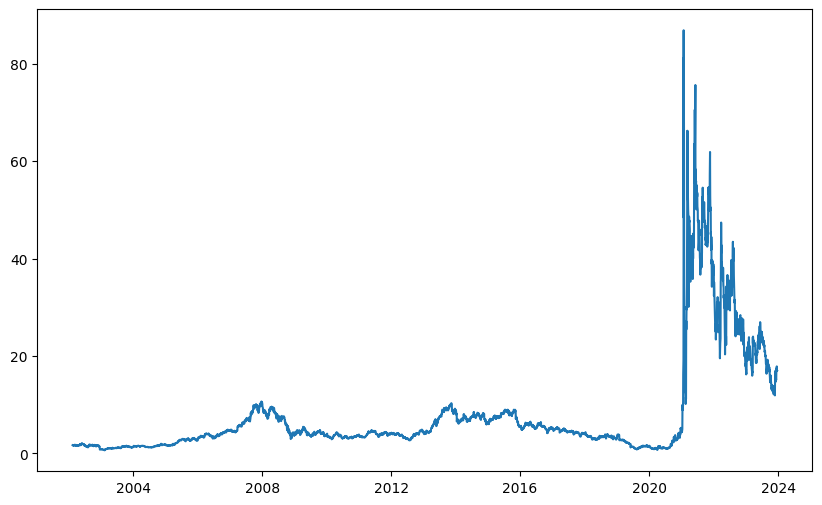

In [59]:
make_graph(gme_data, gme_revenue, 'GameStop')